In [1]:
import os
from typing import List, Tuple

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelBinarizer
from torch import Tensor, load, save
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import PreTrainedTokenizerFast

/home/chickencurry/miniconda3/envs/torch-directml/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer_path = "./data/tokenizer.json"
img_test_dir = "./data/formulae/test"
img_train_dir = "./data/formulae/train"
img_val_dir = "./data/formulae/val"
latex_path = "./data/formulae/math.txt"

In [3]:
class LatexEquationDataset(Dataset):
    def __init__(self, latex_path: str, img_dir: str, tokenizer_path: str):
        super().__init__()
        
        with open(latex_path, "r") as file:
            self._equations = file.readlines()

        self._img_dir = img_dir
        self._img_filenames = os.listdir(img_dir)

        self._tokenizer = PreTrainedTokenizerFast(tokenizer_file = tokenizer_path)

    def __len__(self) -> int:
        return len(self._img_files)
    
    def __getitem__(self, idx: int):
        img_filename = self._img_filenames[idx]
        img_idx = int(img_filename.split(".")[0])

        img = cv2.imread(os.path.join(self._img_dir, img_filename), cv2.IMREAD_GRAYSCALE)
        img_tensor = torch.from_numpy(img)

        equation = self._equations[img_idx]
        tokens = self._tokenizer.tokenize(equation)
        
        return img_tensor, equation, tokens

\theta _ { 1 } + \theta _ { 2 } = \theta _ { 3 } + \theta _ { 4 } = 9 0 ^ { \circ } .

['\\', 'theta', 'Ġ_', 'Ġ{', 'Ġ1', 'Ġ}', 'Ġ+', 'Ġ\\', 'theta', 'Ġ_', 'Ġ{', 'Ġ2', 'Ġ}', 'Ġ=', 'Ġ\\', 'theta', 'Ġ_', 'Ġ{', 'Ġ3', 'Ġ}', 'Ġ+', 'Ġ\\', 'theta', 'Ġ_', 'Ġ{', 'Ġ4', 'Ġ}', 'Ġ=', 'Ġ9', 'Ġ0', 'Ġ^', 'Ġ{', 'Ġ\\', 'circ', 'Ġ}', 'Ġ.', 'Ċ']


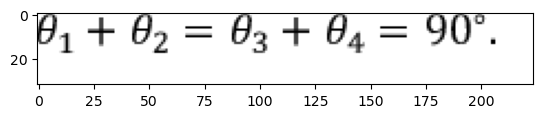

In [4]:
dataset = LatexEquationDataset(latex_path, img_train_dir, tokenizer_path)
img_tensor, equation, tokens = dataset.__getitem__(0)

plt.imshow(img_tensor, cmap="gray")
print(equation)
print(tokens)